***Convolutional Neural Networks***

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2023-07-08 14:04:10.909926: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 14:04:10.968092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 14:04:11.902089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1


In [2]:
'''
 Load fasion MNIST dataset. The input features are 28x28 pixel grayscale images of clothing items and the outout labels consist of 10 possible classes (ten different clothing items) 
Class Label Description:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot) 
'''
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


# check the shapes of the data arrays (there are 600000 training images and 10000 test images)
print(f"training images shape = {training_images.shape}")
print(f"training labels shape = {training_labels.shape}")
print(f"test images shape = {test_images.shape}")
print(f"test labels shape = {test_labels.shape}")

# normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

training images shape = (60000, 28, 28)
training labels shape = (60000,)
test images shape = (10000, 28, 28)
test labels shape = (10000,)


We will now build a better model by adding some convolution and pooling layers on top of our simple model which had only one fully-connected hidden layer and an output layer.

In [6]:
# create the convNet model
model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # note the last dimension of the input shape is 1 
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),                                                   # to denote color depth is 1, i.e. grayscale
                                 keras.layers.Conv2D(filters=32, kernel_size =(3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 
                                 # now add the same layers as before
                                 keras.layers.Flatten(),                                  # flatten layer for reshaping (28,28) image into (28*28,1)
                                 keras.layers.Dense(units=512, activation=tf.nn.relu),    # second hidden layer with 128 neuron and relu activation
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)]) # output layer with 10 neurons and softmax activation

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 512)              

Total params: 424,810
Trainable params: 424,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
# comile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4499 - accuracy: 0.8355 - val_loss: 0.3487 - val_accuracy: 0.8721
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3049 - accuracy: 0.8877 - val_loss: 0.2959 - val_accuracy: 0.8894
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2601 - accuracy: 0.9031 - val_loss: 0.2800 - val_accuracy: 0.8984
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2267 - accuracy: 0.9142 - val_loss: 0.2669 - val_accuracy: 0.8991
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1991 - accuracy: 0.9255 - val_loss: 0.2677 - val_accuracy: 0.9051


Note that adding the convolutional and max pooling layers has substantially improved the validation accuracy

In [5]:
# now we want to visualize the outputs from the hidden conv2d layers to get some idea about what kind of hidden features/filters are being learned

# to do this, we will create a functional API and have it return outputs/activations from every layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# now let's compute the activations for three different images of the same label (in this case '9')
img1 = 0
img2 = 39
img3 = 83

a_img1 = activation_model.predict(test_images[img1].reshape(1,28,28,1))
a_img2 = activation_model.predict(test_images[img2].reshape(1,28,28,1))
a_img3 = activation_model.predict(test_images[img3].reshape(1,28,28,1))


def show_activations(filter):
    # now lets visualioze the activations from the first 4 layers for these three images
    f, axarr = plt.subplots(3,4)


    for l in range(4):
        f1 = a_img1[l]
        f2 = a_img2[l]
        f3 = a_img3[l]
        # plot the activations for first image on first row 
        axarr[0,l].imshow(f1[0,:,:,filter], cmap='inferno')
        axarr[0,l].grid(False)

        # plot the activations for second image on second row 
        axarr[1,l].imshow(f2[0,:,:,filter], cmap='inferno')
        axarr[1,l].grid(False)

        # plot the activations for first image on first row 
        axarr[2,l].imshow(f3[0,:,:,filter], cmap='inferno')
        axarr[2,l].grid(False)



1/1 [==============================] - 0s 17ms/step


Note that the activations from layers 3 and 4 share some common pixels which indicates that the model is detecting common features in the three different images

In [6]:
show_activations(7)

: 

: 

To better understand how what the convolution and maxpooling filters are doing, we can do some experiments on a test image

C:\Users\tanzi\AppData\Local\Temp\ipykernel_24996\2311609002.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent_image = misc.ascent()


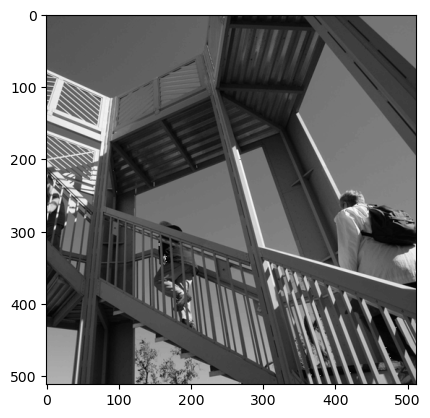

In [ ]:
from scipy import misc

# load test image
ascent_image = misc.ascent()

# visualize the image
plt.imshow(ascent_image, cmap='gray')

In [ ]:
# copy image to a numpy array
test_img = np.copy(ascent_image)

# image dimensions
print(f"Image shape = {test_img.shape}")


Image shape = (512, 512)


In [ ]:
# function that performs convolution (stride 1 and no padding)
def conv(input, filter): 

    # assume nxn image and fxf filter and n>=f
    f = filter.shape[0]
    n = input.shape[0]
 
    # create an array for the convolvution output
    output = np.zeros(shape=(n-f+1,n-f+1))

    for i in range(n-f+1):
        for j in range(n-f+1):
            # make sure the pixel value is within bound
            output[i,j] = min(max(0,np.sum(filter * input[i:i+f, j:j+f])), 255) 

    return output


# function that performs max pooling (poolsize = strides and no padding)
def maxpool(input, poolsize):
    # assume nxn image
    n = input.shape[0]
    f = poolsize
    d = (n-f+1)//f

    # create an array for the convolvution output
    output = np.zeros(shape=(d,d))

    for i in range(d):
        for j in range(d):
            output[i,j] = np.max(input[f*i:f*i+f, f*j:f*j+f])

    return output



In [ ]:
# create some 3x3 filters (note: the sum of all the filter elements should be 1, i.e. normalized filters)
filter1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filter2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
filter3 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [ ]:
# convolve test image with each filter
convolved_image1 = conv(test_img, filter1)
convolved_image2 = conv(test_img, filter2)
convolved_image3 = conv(test_img, filter3)

Text(0.5, 1.0, 'conv filter 3')

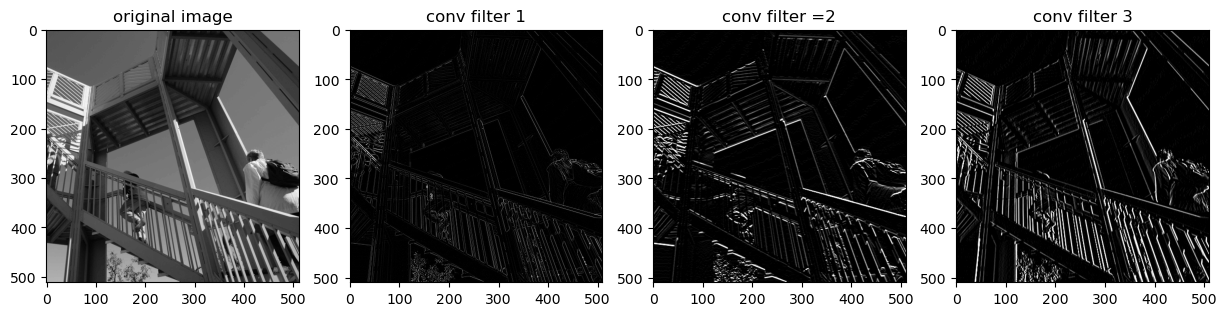

In [ ]:
# visualize the results
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.gray()
plt.imshow(test_img, cmap='gray')
plt.title("original image")

plt.subplot(1,4,2)
plt.imshow(convolved_image1, cmap='gray')
plt.title("conv filter 1")

plt.subplot(1,4,3)
plt.imshow(convolved_image2, cmap='gray')
plt.title("conv filter =2")

plt.subplot(1,4,4)
plt.imshow(convolved_image3, cmap='gray')
plt.title("conv filter 3")

Note that filter 2 detects the horizontal edges and filter 3 detecs vertical edges.

Text(0.5, 1.0, 'maxpool conv filter 3')

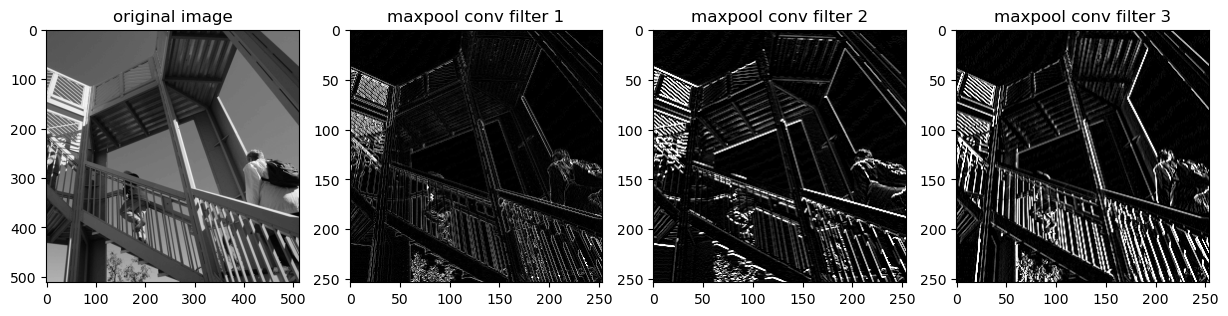

In [ ]:
# now maxpool the convolved images
maxpool_image1 = maxpool(convolved_image1,2)
maxpool_image2 = maxpool(convolved_image2,2)
maxpool_image3 = maxpool(convolved_image3,2)

# visualize the results
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.gray()
plt.imshow(test_img, cmap='gray')
plt.title("original image")

plt.subplot(1,4,2)
plt.imshow(maxpool_image1, cmap='gray')
plt.title("maxpool conv filter 1")

plt.subplot(1,4,3)
plt.imshow(maxpool_image2, cmap='gray')
plt.title("maxpool conv filter 2")

plt.subplot(1,4,4)
plt.imshow(maxpool_image3, cmap='gray')
plt.title("maxpool conv filter 3")

Note that maxpooling output images are compressed verions of the input. Maxpooling also emphasizes the effect from each filter, e.g. note that the horizontal edges are now sharper for filter 2 and vertical edges look sharped for filter 3. Therefore, maxpooling retains all the important features after compression.
